# Statistical-Methods Homework1: One-Way ANOVA

https://github.com/QiushiSun

## 背景描述
为了调查吃巧克力对心血管健康的影响，实验由三种类型的巧克力组成：100g的黑巧克力，含有200mg全脂牛奶的100g黑巧克力和200g的牛奶巧克力。12个实验对象：7女5男。在不同的天数里，每个实验对象将吃一种类型的巧克力，一个小时后测量他们血浆的总抗氧能力。 
这是一个因子水平数 𝑎 = 3 和重复次数 𝑛 = 12 的单因子实验。



## 数据描述
实验次序本身具有随机性，无需再随机化

| 变量名 | 变量含义 | 变量类型 | 变量取值范围 |
| :----------: | :--------: | :----------: | :----------: |
| （自变量）Chocolate | 巧克力类型 | categorical variable | [1, 2, 3] |
| （因变量）Capacity | 血浆浓度 | continuous variable | Real |



## 问题 
注：这里使用 \alpha=0.05 的显著性水平

1. 试判断食用的 3 种巧克力对心血管健康的影响是否有差异.
2. 试判断该实验用One-way ANOVA模型是否恰当.
3. 估计食用这 3 种巧克力 1h 后血浆的总抗氧能力均值和误差的方差.
4. 若Q1判断存在差异，请进行多重比较.

## 解决方案

In [40]:
import numpy as np
import pandas as pd

In [41]:
# load some stats packages
import scipy.stats as stats
import matplotlib.pyplot as plt
import math
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from scipy.stats import f

**Q1:试判断食用的 3 种巧克力对心血管健康的影响是否有差异.** 

$\color{blue}{\textit Solution:}$

检验假设:
假设原假设$H_0: \mu_1 = \mu_2 = \mu_3 $与备择假设$ H_1: \mu_1, \mu_2, \mu_3$不全相等



Anova Table

| 来源  | 平方和(SS) | 自由度(f) |        均方(MS)        |     检验统计量(F)     |    P-value    |
| :---: | :--------: | :-------: | :--------------------: | :-------------------: | :-----------: |
| 因子A |   $S_A$    | $f_A=a-1$ | $MS_A=\frac{S_A}{f_A}$ | $F=\frac{MS_A}{MS_E}$ | $p=P(Y\ge F)$ |
| 误差E |   $S_E$    | $f_e=n-a$ | $MS_E=\frac{S_E}{f_E}$ |                       |               |
| 总和T |   $S_T$    | $f_T=n-1$ |                        |                       |               |

计算关系如下

$\begin{array}{ll}
S_{T}=\sum_{i=1}^{a} \sum_{j=1}^{m_{i}}\left(y_{i j}-\bar{y}\right)^{2}=\sum_{i=1}^{r} \sum_{j=1}^{m_{i}} y_{i j}^{2}-\frac{T^{2}}{n}, & f_{T}=n-1 \\
S_{A}=\sum_{i=1}^{a} m_{i}\left(\bar{y}_{i} .-\bar{y}\right)^{2}=\sum_{i=1}^{r} \frac{T_{i}^{2}}{m_{i}}-\frac{T^{2}}{n}, & f_{A}=a-1, \\
S_{e}=\sum_{i=1}^{a} \sum_{j=1}^{m_{i}}\left(y_{i j}-\bar{y}_{i \cdot}\right)^{2}=S_{T}-S_{A}, & f_{e}=n-a
\end{array}$

In [54]:
Alpha = 0.05

a = 3
n = 12
load_data = pd.read_csv('Project1.csv')

data = load_data.values[:,1:3]

print(type(data))

group1 = data[data[:,0] == 1,1]
group2 = data[data[:,0] == 2,1]
group3 = data[data[:,0] == 3,1]

#One-way ANOVA

df = pd.DataFrame(data, columns = ['Chocolate', 'Capacity'])

model = ols('Capacity ~ C(Chocolate)', df).fit()

anovaResults = round(anova_lm(model), 2)
print('The ANOVA table: \n', anovaResults)  

F0, pVal1 = stats.f_oneway(group1, group2, group3)

# 法1：
print('P-value of one way ANOVA:', pVal1)

if pVal1 < Alpha:
    print('\nSince p-value < 0.05, reject H0.')
else:
    print('\nAccept H0.') 
    
# 法2：
F = round(f.ppf(0.95,dfn =2,dfd = 33), 2)

if F0 > F:
    print('Since F0 > F(0.05,2,33) = ', F, ', reject H0.') #F分布的参数 a-1, n-a
else:
    print('Accept H0.') 

<class 'numpy.ndarray'>
The ANOVA table: 
                 df   sum_sq  mean_sq      F  PR(>F)
C(Chocolate)   2.0  1952.64   976.32  93.58     0.0
Residual      33.0   344.31    10.43    NaN     NaN
P-value of one way ANOVA: 2.5152590041683006e-14

Since p-value < 0.05, reject H0.
Since F0 > F(0.05,2,33) =  3.28 , reject H0.


简单复习下pandas数组索引用法

1. data = load_data.values[0,:] #返回第一行
2. data = load_data.values[0,0] #返回第(1,1)个元素
3. data = load_data['Chocolate'].values #打印第一列Obs的数值
4. data = load_data.values[1:30:2] #和数组一样的用法 list[start:end:stride]
5. data[:,0]就是取矩阵X的所有行的第0列的元素，X[:,1] 就是取所有行的第1列的元素
6. data[:,m:n]即取矩阵X的所有行中的的第m到n-1列数据，含左不含右。
7. data[0,:]就是取矩阵X的第0行的所有元素，X[1,:]取矩阵X的第一行的所有元素


**Q2:试判断该实验用One-way ANOVA模型是否恰当** 

$\color{blue}{\textit Solution:}$

想要判断ANOVA模型是否恰当，可以利用残差检测来进行分析。  
处理 $i$ 的观测值 $j$ 的残差定义为：$e_{ij} = y_{ij} - \hat{y}_{ij}$  
其中$\hat{y}_{ij}$是对应于$y_{ij}$的一个估计， 
$\hat{y}_{ij} = \hat{\mu} + \hat{\tau}_i = \overline{y}_{··} + (\overline{y}_{i·} - \overline{y}_{··}) = \overline{y}_{i·}$  
  
**1. 独立性检验**  

【法1】利用残差的时序图，依照收集数据的时间顺序画出残差图有助于检测残差之间的相关性。

data_res
order
[2.74, 6.54, -0.46, -2.46, 3.44, -0.16, -0.26, -0.96, 0.84, -0.66, -8.16, 4.7, 0.4, 2.0, -3.6, 1.2, -1.8, -0.7, -0.9, 1.9, 0.2, 3.8, -7.2, 1.92, 5.62, -0.58, 2.52, -1.38, 0.72, 2.62, -1.48, -5.48, -2.38, -0.48, -1.58]


Text(0, 0.5, 'Residuals')

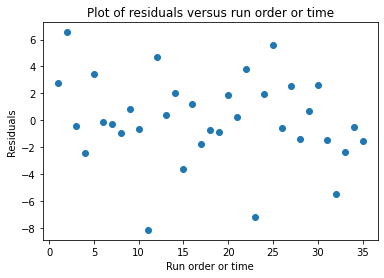

In [43]:
data_res = data.astype(float) * 1
#print(data_res)

list_Chocolate = [1, 2, 3]

for k in list_Chocolate:
    cnt = data_res[data_res[:,0] == k,1]
    data_res[data_res[:,0] == k,1] = cnt - np.mean(cnt)
    
# 画出残差时序图，检测残差之间是否具有独立性
print('data_res')

x = pd.read_csv('Project1.csv')

random_seq = x.values[:,1]
# print('random_seq')
# print(random_seq)
data_seq = data_res * 1

order = []
for seq in random_seq:
    for Chocolate, Capacity in data_seq:
        if((seq == Chocolate) & (Capacity != 0)):
            order.append(round(Capacity,2))
            data_seq[data_seq[:,1] == Capacity,1] = 0
            break

print('order')
print(order)
# print(len(order))
            
x_order = np.linspace(1,35,35)

plt.scatter(x_order, order)
plt.title('Plot of residuals versus run order or time')
plt.xlabel('Run order or time')
plt.ylabel('Residuals')

【法2】利用Durbin-Watson检验，又称DW检验来做独立性检验。是用来检验分析中残差的一阶自相关性的。  
各残差的相关性方程为：$e_i = \rho * e_{i-1} + v_i$，检验的原假设为：$\rho = 0$，备择假设为：$\rho \neq 0$  
检验统计量为：$$d = \frac{\sum^T_{t=2}\quad(e_i-e_{i-1})^2}{\sum^T_{t=1}\quad e_i^2}$$

In [44]:
def durbin_watson(residuals):
    nume = sum(np.diff(residuals.T) ** 2)
    deno = sum(residuals ** 2)
    return nume / deno
# print(data_res)
res = data_res[:, 1]
print(res)
dw = durbin_watson(res)
print('Durbin-Watson检验的统计量为：', round(dw,2))

[ 2.74166667  6.54166667 -0.45833333 -2.45833333  3.44166667 -0.15833333
 -0.25833333 -0.95833333  0.84166667 -0.65833333 -0.45833333 -8.15833333
  4.7         0.4         2.         -3.6         1.2        -1.8
 -0.7        -0.9         1.9         0.2         3.8        -7.2
  1.91666667  5.61666667 -0.58333333  2.51666667 -1.38333333  0.71666667
  2.61666667 -1.48333333 -5.48333333 -2.38333333 -0.48333333 -1.58333333]
Durbin-Watson检验的统计量为： 2.3


依据本题数据，Durbin-Watson检验统计量值为2.3，$2.3 \in (1,3)$，故认为合理

**2. 方差齐性检验**  
【法1】Bartlett检验的核心思想是通过求取不同组之间的卡方统计量，然后根据卡方统计量的值来判断组间方差是否相等。该方法极度依赖于数据是正态分布，如果数据非正态分布，则的出来的结果偏差很大。  

Bartlett检验统计量为：$\chi_0^2 = 2.3026\frac{q}{c}$ 

其中：

$q = (N - a)log_{10}S_p^2 - \sum_{i=1}^a(n_i - 1)log_{10}S_i^2$

$c = 1 + \frac{1}{3(a-1)}(\sum_{i=1}^a(n_i-1)^{-1} - (N - a)^{-1})$  

$S_p^2 = \frac{\sum_{i=1}^a\quad(n_i-1)S_i^2}{N - a}$ 且$S_i^2$是第 $i$ 个总体的样本方差；当$\chi_0^2 > \chi_{\alpha,a-1}^2$ 时，拒绝$H_0$，其中$\chi_{\alpha,a-1}^2$是自由度为$a-1$的卡方分布上的 $\alpha$ 分位数。

Remark:

$$\chi^{2}=\frac{(N-a) \ln \left(S_{p}^{2}\right)-\sum_{i=1}^{k}\left(n_{i}-1\right) \ln \left(S_{i}^{2}\right)}{1+\frac{1}{3(k-1)}\left(\sum_{i=1}^{k}\left(\frac{1}{n_{i}-1}\right)-\frac{1}{N-a}\right)}$$



In [45]:
# 用Bartlett检验进行方差齐性检验
bart, pVal2 = stats.bartlett(group1, group2, group3)
bart_stat = stats.chi2.isf(alpha, a-1)

# 法1:计算Bartlett检验的P值
print('Bartlett检验的P值为：', round(pVal2, 2))
if pVal2 < alpha:
    print('Since p-value < 0.05, reject H0.')
else:
    print('Accept H0')  

# 法2：计算Bartlett检验统计量
print('Bartlett检验统计量：', round(bart, 2))
print('𝜒_(𝛼,𝑎−1)^2: ', round(bart_stat, 2))
if bart > bart_stat:
    print('Since 𝜒_0^2 > 𝜒_(𝛼,𝑎−1)^2, reject H0.')
else:
    print('Accept H0')  

Bartlett检验的P值为： 0.81
Accept H0
Bartlett检验统计量： 0.42
𝜒_(𝛼,𝑎−1)^2:  5.99
Accept H0


由分析可知，Bartlett检验的P值大于 0.05 且Bartlett检验统计量小于 5.99，故接受原假设，即残差具有方差齐性。  
  
方法2: Levene检验是将每个值先转换为该值与其组内均值的偏离程度，然后再用转换后的偏离程度去做方差分析，即组间方差/组内方差。修正后的Levene检验中的均值采用中位数的计算方法，因此这里的偏差用每个处理的观测值$y_{ij}$与该处理中的中位数$\tilde{y}_{i·}$的偏差的绝对值来表示：$d_{ij} = |y_{ij} - \tilde{y}_{i·}|, i = 1,2,···,a;j = 1,2,···,n$

方差齐性检验的一种，与Bartlett检验功能类似，但是相对宽松

Levene检验统计量：

$$W=\frac{1}{M S_{e}} \frac{N\left(\bar{Z}-\bar{Z}_{i}\right)^{2}}{r-1}$$

In [46]:
# 用Levene检验进行方差齐性检验
lene, pVal3 = stats.levene(group1, group2, group3)
print('Levene检验的P值为：', round(pVal3, 2))
if pVal3 < alpha:
    print('Since p-value < 0.05, reject H0.')
else:
    print('Accept H0')  

Levene检验的P值为： 0.98
Accept H0


由分析可知，Levene检验的P值大于 0.05，故残差具有方差齐性。

**3. 正态性检验**  
【法1】利用qq图（The quantitle-quantile plot），来检验数据分布的相似性。令X轴为正态分布的分位数，Y轴为样本分位数，如果这两者构成的点分布在一条直线上，就证明样本数据与正态分布存在线性相关性，即服从正态分布。

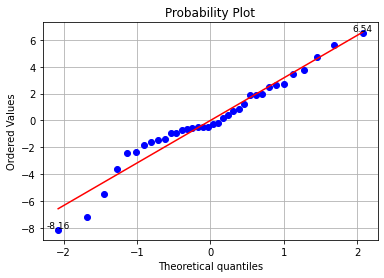

[-8.15833333 -7.2        -5.48333333 -3.6        -2.45833333 -2.38333333
 -1.8        -1.58333333 -1.48333333 -1.38333333 -0.95833333 -0.9
 -0.7        -0.65833333 -0.58333333 -0.48333333 -0.45833333 -0.45833333
 -0.25833333 -0.15833333  0.2         0.4         0.71666667  0.84166667
  1.2         1.9         1.91666667  2.          2.51666667  2.61666667
  2.74166667  3.44166667  3.8         4.7         5.61666667  6.54166667]


In [47]:
# 用qq图进行正态性检验
osm, osr = stats.probplot(res, dist = 'norm', plot = plt)
x1 = osm[0][0]
y1 = osm[1][0]
plt.text(x1, y1, '%.2f' % float(y1), ha = 'center', va = 'bottom',fontsize = 9)
x2 = osm[0][-1]
y2 = osm[1][-1]
plt.text(x2, y2, '%.2f' % float(y2), ha = 'center', va = 'bottom',fontsize = 9)
plt.grid()
plt.show()

print(osm[1])

由上图可以看出，总体上来看，误差分布是近似正态的；

qq图中间偏右边略微向下弯曲，在中间左边稍有上翘，这意味着误差分布的尾部比起正态分布的尾部要更薄一些，即最大的残差不完全如所期望的那样大。  

**检测异常值的方法：**  

计算标准化残差：$d_{ij} = \frac{e_{ij}}{\sqrt{MS_E}}$。一般地，标准化残差约 68% 落在 ±1 之内，约 95% 落在 ±2 之内，几乎全部落在 ±3 之内。标准化残差的绝对值大于3的残差是一个可能的异常值。  

从上述表中找到最大绝对值得残差，由上述公式得 $d_1 = \frac{e_1}{\sqrt{MS_E}} = -\frac{8.15}{\sqrt{10.43}} = -2.52 \in (-3,3)$，故可说明无明显的异常值，即残差是服从正态分布的。  
  
【法2】利用Shapiro-Wilk检验来做正态性检验，其原假设：样本数据符合正态分布。（注：适用于小样本）  
利用方法stats.shapiro()检验正态性，输出结果中第一个为统计量，第二个为P值（统计量越接近 1 越表明数据和正态分布拟合的好，P值大于指定的显著性水平，接受原假设，认为样本来自服从正态分布的总体）

Shapiro-Wilk检验统计量

$$W=\frac{\left(\sum_{i=1}^{n} a_{i} x_{(i)}\right)^{2}}{\sum_{i=1}^{n}\left(x_{i}-\bar{x}\right)^{2}}$$

In [51]:
# 用Shapiro-Wilk检验进行正态性检验
SW, pVal4 = stats.shapiro(res)
print('Shapiro-Wilk',round(SW, 2))
print('pValue',round(pVal4, 2))

if pVal4 > alpha:
    print('\nAccept the null hypothesis.')
else:
    print('\nSince p-value > 0.05, reject the null null hypothesis') 

Shapiro-Wilk 0.96
pValue 0.26

Accept the null hypothesis.


由上述分析可知，统计量为 0.96，接近 1；且P值为 0.26，大于指定的显著性水平 0.05。故认为残差来自服从正态分布的总体。 

**Q3:估计食用这 3 种巧克力 1h 后血浆的总抗氧能力均值和误差的方差.** 

$\color{blue}{\textit Solution:}$


In [52]:
# Estimation of Parameter(𝜎2 and 𝜇𝑖 )
mu_1 = np.mean(group1)
mu_2 = np.mean(group2)
mu_3 = np.mean(group3)

mu = [mu_1, mu_2, mu_3]

sse = 0
for i in range(a):
    se = 0
    power_list = data[data[:,0] == (i+1),1]
    for j in range(n):
        se += (power_list[j] - mu[i]) ** 2
    sse += se
var = round(sse / (a * (n - 1)),2) 
print('Estimate of the population mean：{0}'.format(mu))
print('An estimate of the population variance：{0}'.format(var))

Estimate of the population mean：[116.05833333333334, 100.7, 100.18333333333332]
An estimate of the population variance：10.43



**Q4:若Q1判断存在差异，请进行多重比较.** 

$\color{blue}{\textit Solution:}$


由Q1的分析可知，3种巧克力对心率的影响存在显著性差异，故进行多重比较。这里采用Fisher最小显著性差异（LSD）方法。  
检验：$$H_0: \mu_i = \mu_j  vs  H_1: \mu_i \neq \mu_j$$ 
检验统计量：$t_0 = \frac{\overline{y}_{i·} - \overline{y}_{j·}}{\sqrt{MS_E·2/n}}$  
当$|\overline{y}_{i·} - \overline{y}_{j·}| > t_{\frac{\alpha}{2},N-a}\sqrt{MS_E·2/n}$时，拒绝原假设，可表明均值对$\mu_i$与$\mu_j$有显著性差异。

In [53]:
#LSD(least significant difference)最小显著差异
def LSD():   
    df = a * (n-1)
    t_value = stats.t(df).isf(alpha / 2)    
    mse = var
    lsd = t_value * math.sqrt(2.0 * mse / n)
    # print(lsd)
    return lsd

for i in range(a):
    for j in range(i + 1,a):
        dist = round(abs(mu[i] - mu[j]), 1)
        print('The difference between group', i + 1, 'and group', j + 1, ': ', dist)
#         if(dist < LSD()):
#             print('There\'s no difference between group', i + 1, 'and group', j + 1)
#         else:
#             print('There\'s significant difference between group', i + 1, 'and group', j + 1)
print('Value of LSD: ', round(LSD(),2))
        
cmp = 0
for s in range(a):
    for t in range(s + 1, a):
        lsd = LSD()
        dist = round(abs(mu[s] - mu[t]), 1)
        if(dist < lsd):
            print('No difference between group', s + 1, 'and group', t + 1)
            cmp += 1
if(cmp == 0):
    print('Reject H0, and there is significant difference in the mean value of any two treatments')

The difference between group 1 and group 2 :  15.4
The difference between group 1 and group 3 :  15.9
The difference between group 2 and group 3 :  0.5
Value of LSD:  2.68
No difference between group 2 and group 3


可见在group1与group2，group1与group3之间有比较显著的差异，在group2与group3之间没有显著差异

**End of Homework1**